In [1]:
#!pip install panel

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
a = """

Texto
de varias
líneas
"""

In [4]:
import matplotlib.pyplot as plt

In [5]:
def onda_seno(m=1):
    """
    Devuelve una gráfica de líneas con una onda seno.
    
    :param m: el parámetro aceleración de la onda
    :return: objeto de matplotlib
    """
    f = plt.figure()
    
    x = np.linspace(0, 10, 500)
    y = np.sin(m*x)
    sns.lineplot(x,y)
    
    plt.close()
    return f

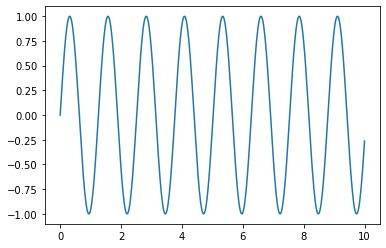

In [18]:
onda_seno(m=5)

In [19]:
import panel

In [20]:
panel.extension()

Column
    [0] Column
        [0] IntSlider(end=210, name='m', start=-210, value=1)
        [1] IntSlider(end=3, name='a', start=-1, value=1)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00132')
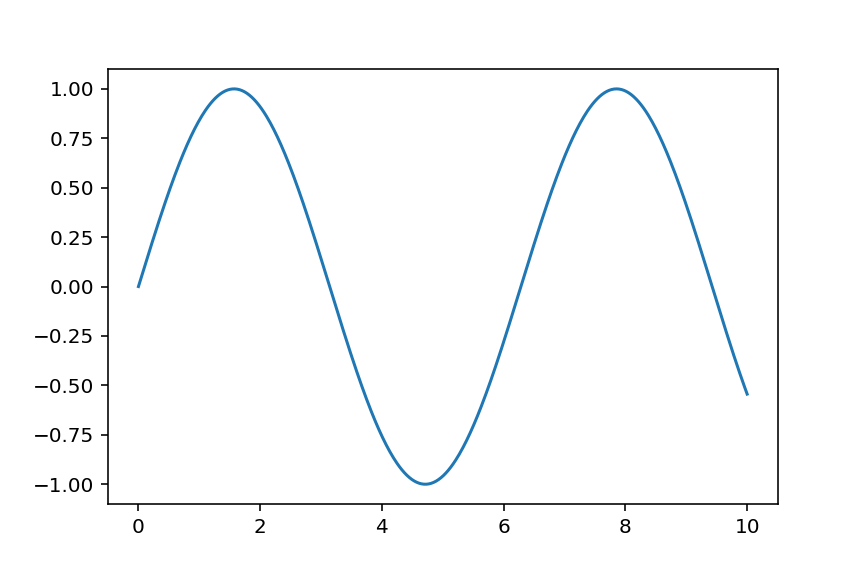

In [21]:
panel.interact(onda_seno, m=(-210, 210))

# Ejercicio 1

In [10]:
# Ejercicio: añadir un parámetro llamado a. Este parámetro es la amplitud
#      a * sin( m * x)
def onda_seno(m=1, a=1, nombre=""):
    """
    Devuelve una gráfica de líneas con una onda seno.
    
    :param m: el parámetro aceleración de la onda
    :return: objeto de matplotlib
    """
    f = plt.figure()
    
    x = np.linspace(0, 10, 500)
    y = np.sin(m*x) * a
    sns.lineplot(x,y)
    
    plt.close()
    return f

C:\Users\ancar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Column
    [0] Column
        [0] IntSlider(end=210, name='m', start=-210, value=1)
        [1] IntSlider(end=5, name='a', start=-5, value=1)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00111')
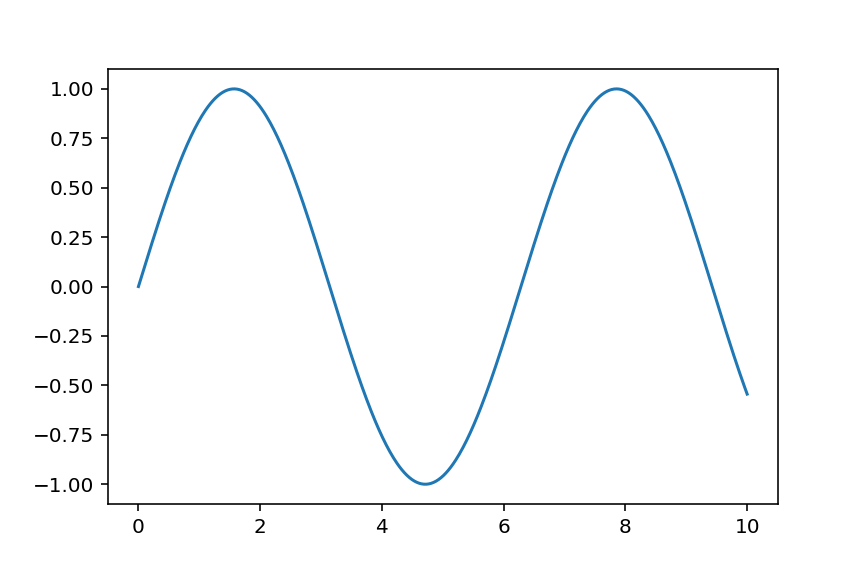

In [11]:
panel.interact(onda_seno, m=(-210, 210), a=(-5,5))

# Ejercicio 2

In [12]:
import seaborn as sns

fmri = sns.load_dataset("fmri")

fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [13]:
# Pintar gráfica de líneas con seaborn que se vea todas las regiones
# de un único sujeto (s5)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

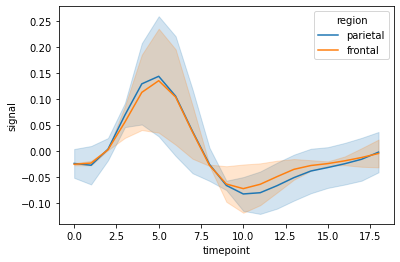

In [14]:
sns.lineplot(data=fmri.query("subject == 's5'"),
             x="timepoint", y="signal", hue="region")

Hacer un panel que me permita elegir que sujeto filtro (con un selector)

Recordatorios:

1. Para hacer un selector de opciones se pasa una lista de estas: k=["a", "b"] 
2. Para hacer la función tenéis que usar figure y close    



In [15]:
def ejercicio2_resuelto(sujeto):
    f = plt.figure()
    datos = fmri[fmri["subject"] == sujeto]
    sns.lineplot(data=datos,
             x="timepoint", y="signal", hue="region")
    plt.close()
    return f

Column
    [0] Column
        [0] Select(name='sujeto', options=['s13', 's5', ...], value='s13')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00122')
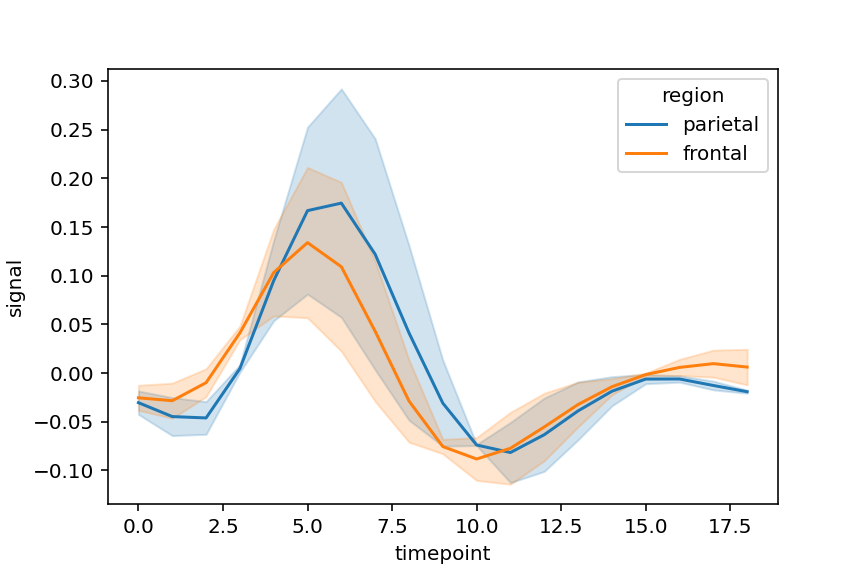

In [16]:
panel.interact(ejercicio2_resuelto, sujeto=fmri["subject"].unique().tolist())